In [23]:
import pathlib
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
from tensorflow.keras import datasets, layers, models
import tensorflow as tf



In [24]:
#defining some parameters
batch_size = 32
img_height = 128
img_width = 128

In [25]:
#gathering the data and separating into training and validation datasets
data_dir = 'data/images/archive/'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 20000 files belonging to 2 classes.
Using 14000 files for training.


In [26]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 20000 files belonging to 2 classes.
Using 6000 files for validation.


In [27]:
#The features
class_names = train_ds.class_names
print(class_names)


['with_mask', 'without_mask']


In [11]:
#Designing the CNN
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2,activation = 'softmax'))

In [12]:
#Compiling the model
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])




In [13]:
#Training the model
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=1, 
  shuffle=True
)


438/438 [==============================] - 2745s 6s/step - loss: 18.0779 - accuracy: 0.9384 - val_loss: 0.0064 - val_accuracy: 0.9982


In [16]:
#used to load images and plot them
import cv2 as cv

In [50]:
#Function which when given an image from the dataset 
#it outputs the image and the prediction for the image
def predictions(img="with_mask/with-mask-default-mask-seed5777.png"):
    img_path = "data/images/archive/" + img
    image1 = cv.imread(img_path)
    image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB )
    image1= cv.resize(image1, (img_height,img_width), interpolation = cv.INTER_AREA)
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
    plt.imshow(image1)
    plt.show()
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    tf.image.rgb_to_grayscale(img_batch)
    prediction = model.predict(img_batch)
    print(class_names[np.argmax(prediction)])
    print(prediction[0])


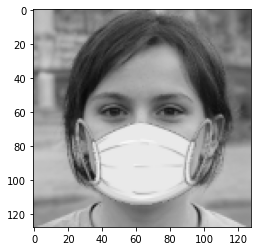

with_mask
[1.0000000e+00 1.6261908e-15]


In [71]:
#Testing the model
predictions("with_mask/with-mask-default-mask-seed2322.png")


In [69]:
#Saving the model
filename = 'trained_mask_model.sav'
joblib.dump(model, filename)

INFO:tensorflow:Assets written to: ram://0a323210-7b94-47cc-b1e9-48564cc2935a/assets


['trained_mask_model.sav']